In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as m_dates
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])
df = df.set_index('Dates')

/tmp/ipykernel_9498/4248875685.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('Nat_Gas.csv', parse_dates=['Dates'])


In [3]:
df

,Prices
Dates,
2020-10-31,10.10
2020-11-30,10.30
2020-12-31,11.00
2021-01-31,10.90
2021-02-28,10.90
2021-03-31,10.90
2021-04-30,10.40
2021-05-31,9.84
2021-06-30,10.00


In [4]:
print(df.index.dtype)

datetime64[ns]


## Natural Gas Price Visualizations

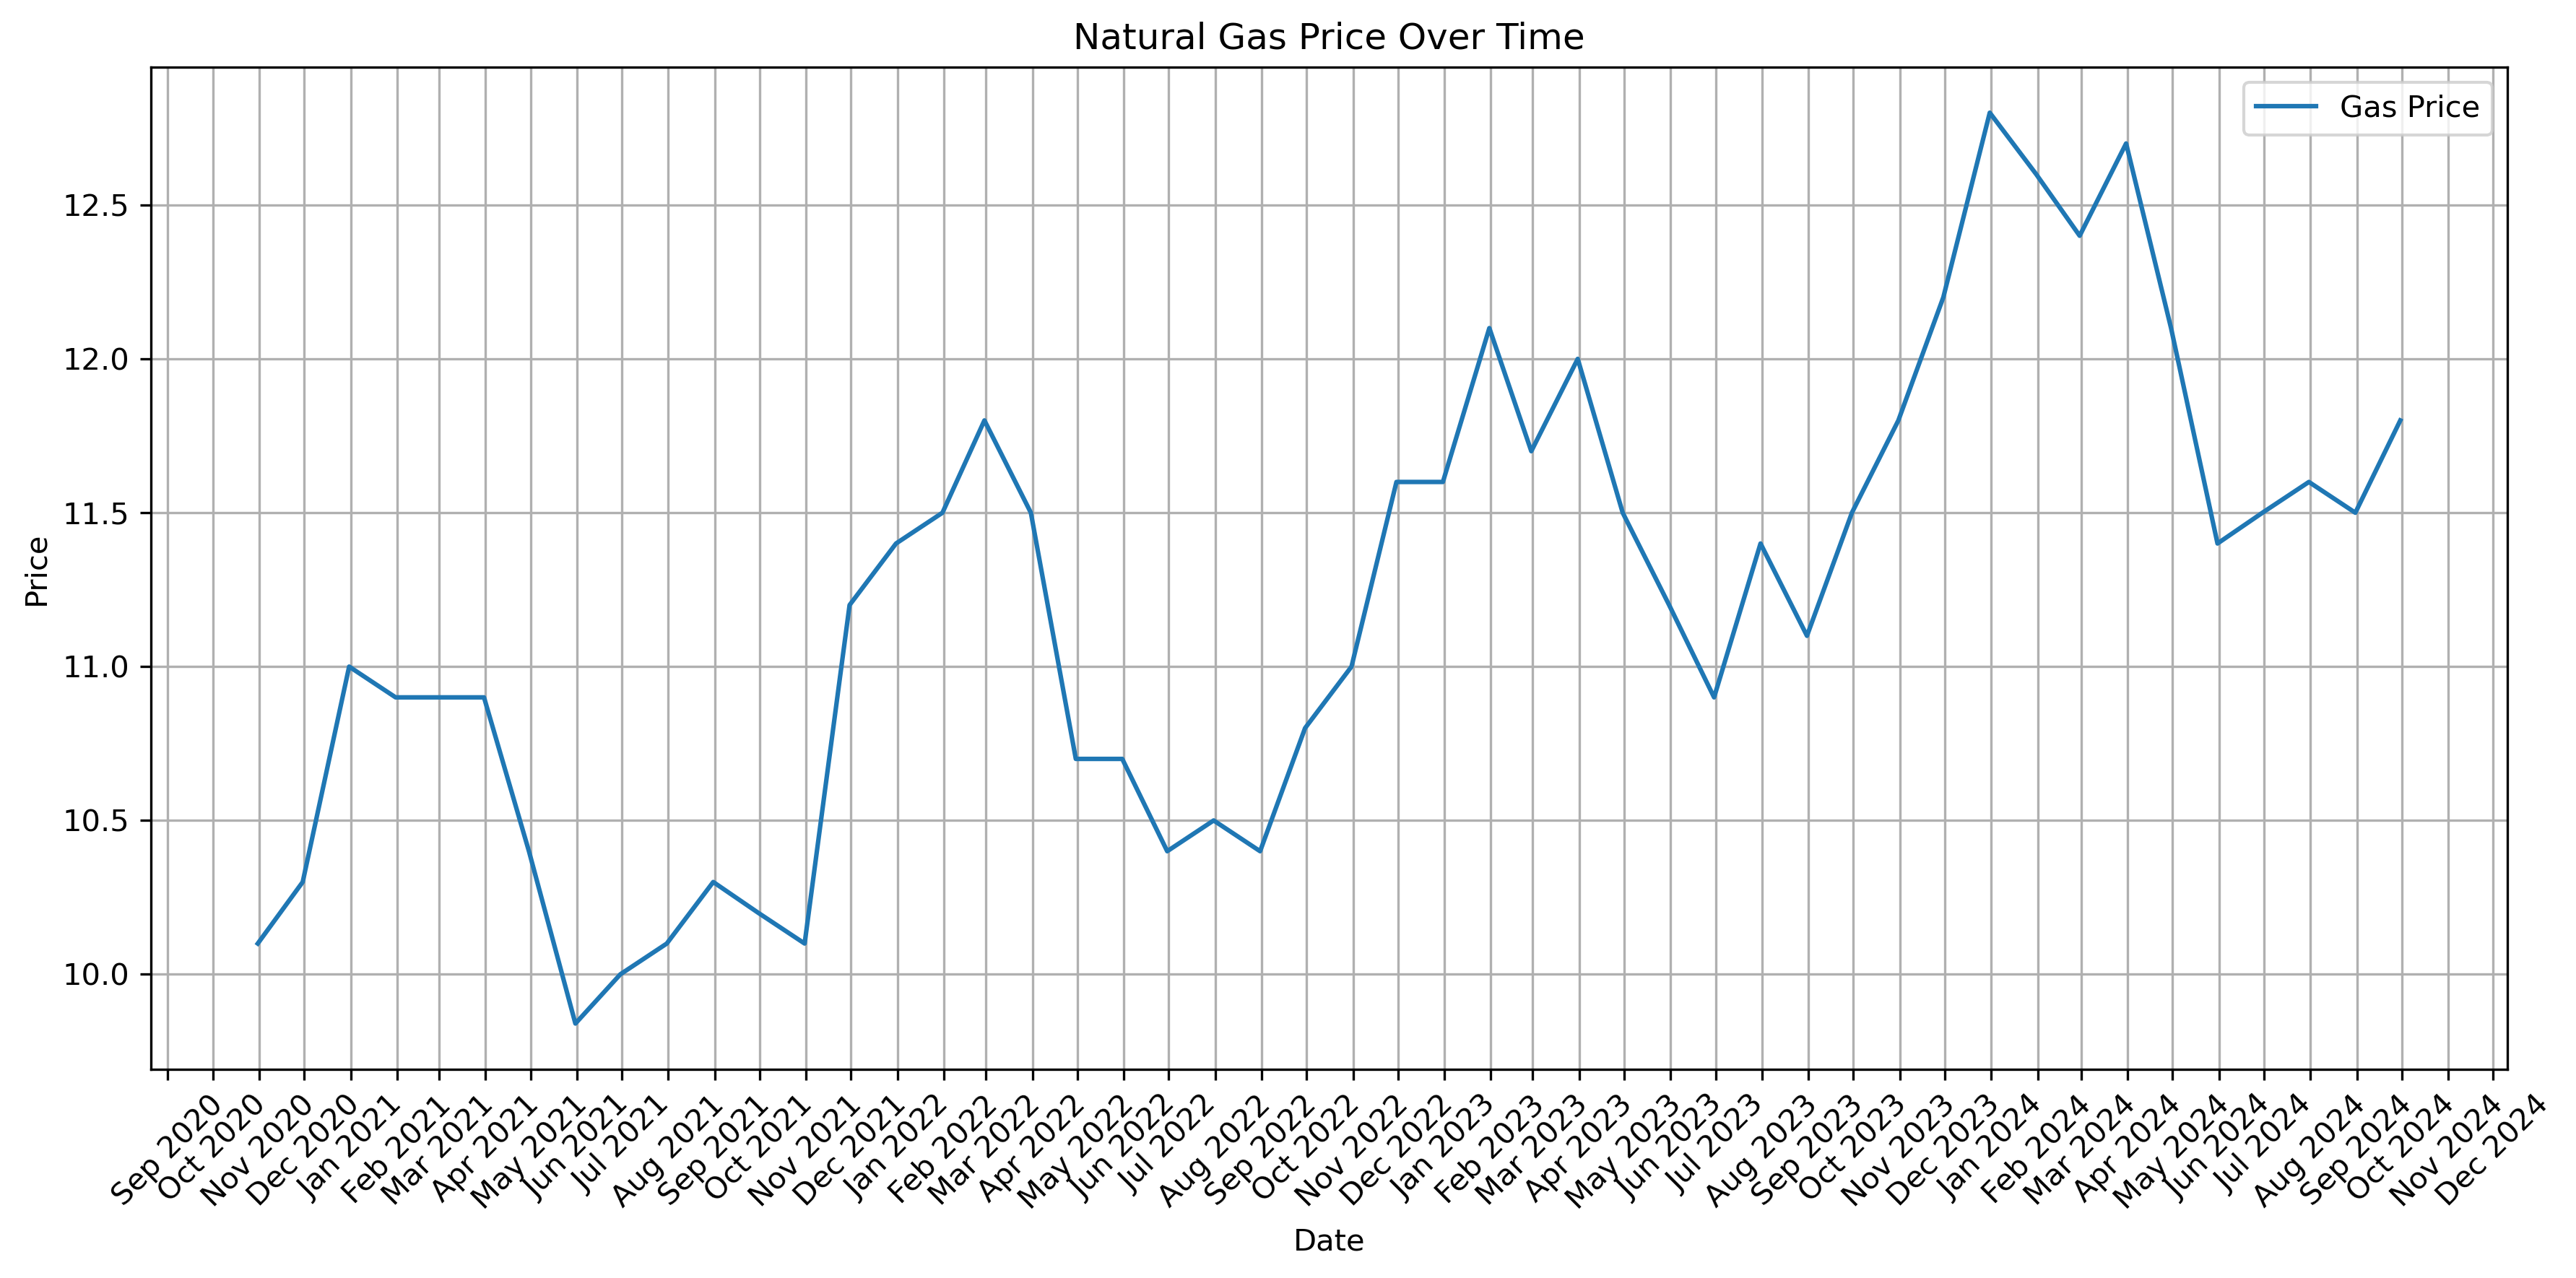

In [5]:
plt.figure(figsize=(12,6), dpi=300)
plt.plot(df.index, df['Prices'], label='Gas Price')

plt.title('Natural Gas Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()

# Format x-axis ticks by month
plt.gca().xaxis.set_major_locator(m_dates.MonthLocator(interval=1))  # one tick per month
plt.gca().xaxis.set_major_formatter(m_dates.DateFormatter('%b %Y'))  # e.g., Jan 2024

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

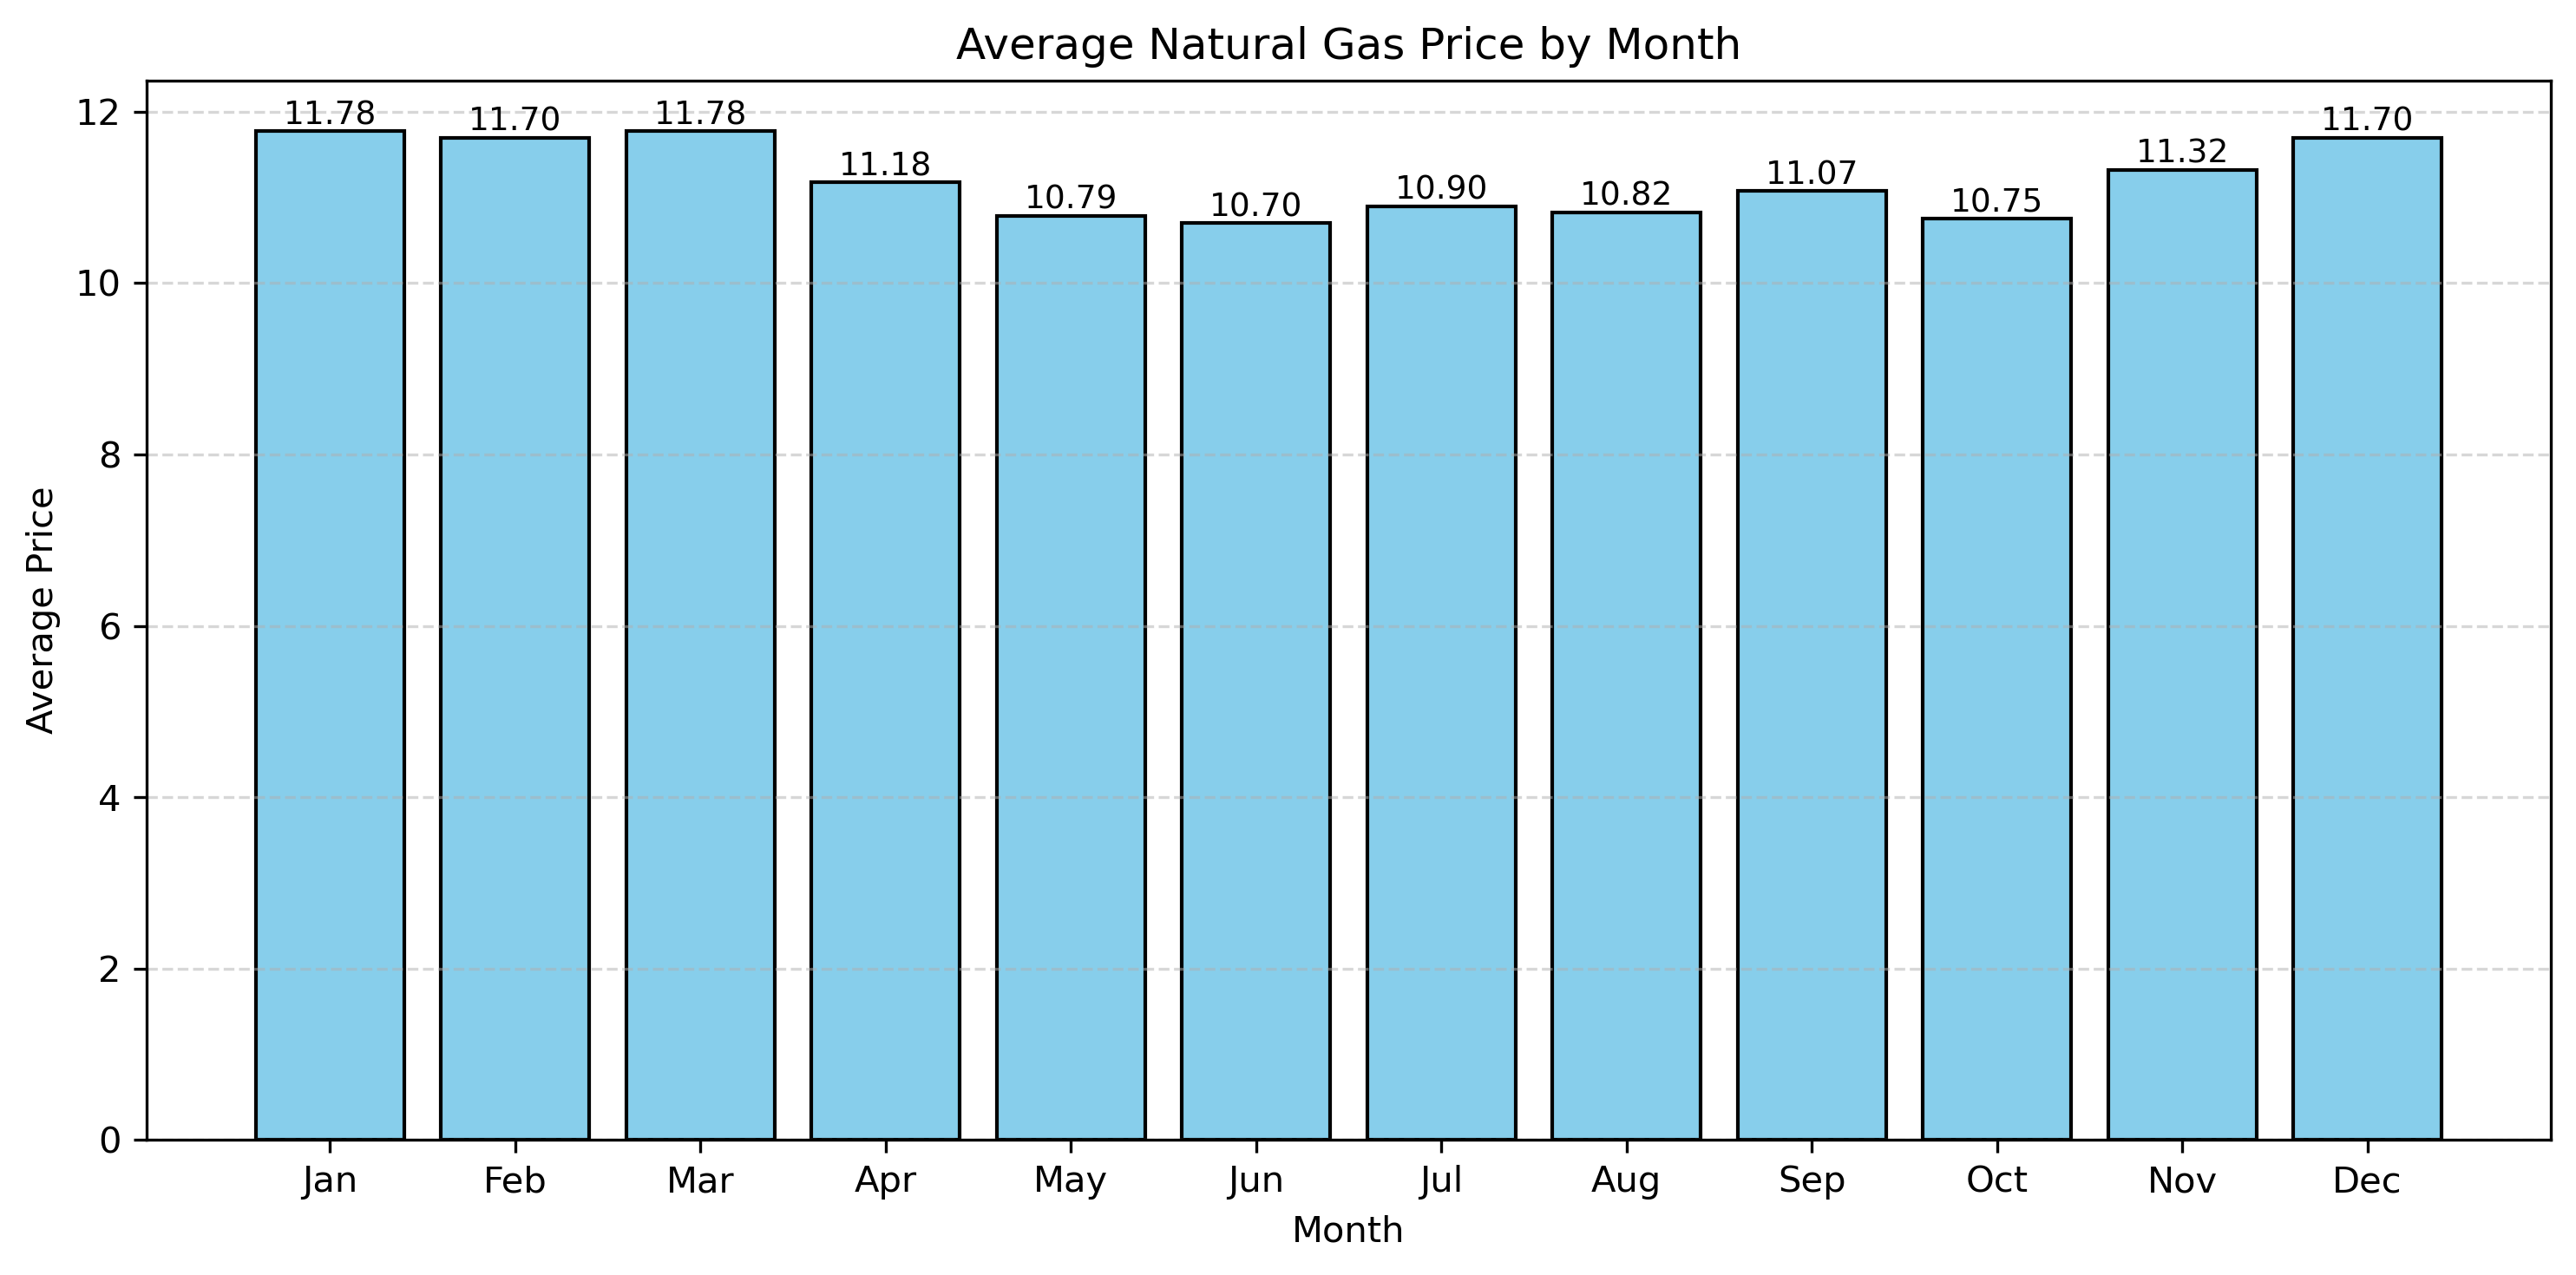

In [6]:
# Create 'Month' column
df['Month'] = df.index.month

# Group by month and calculate average price
monthly_avg = df.groupby('Month')['Prices'].mean()

# Plotting
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)  
bars = ax.bar(monthly_avg.index, monthly_avg.values, color='skyblue', edgecolor='black')

# Titles and labels
ax.set_title('Average Natural Gas Price by Month')
ax.set_xlabel('Month')
ax.set_ylabel('Average Price')
ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add labels above bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
            ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## Why SARIMA?
The dataset used in this project contains monthly daya from October 2020 to September 2024. This gives us about 48 months of data (4 years).

SARIMA lets us account for both trend and seasonality. As we can see before in the visualizations part, short-term trends (`Average Natural Gas Price by Month`) and seasonal patterns (`Natural Gas Price Over Time`) both exist in the dataset. So this makes it ideal for us to use SARIMA in this task.

## Find the Best SARIMA parameters

In [7]:
stepwise_model = auto_arima(df['Prices'],
                            start_p=0, start_q=0,
                            max_p=3, max_q=3,
                            seasonal = True,
                            m=12,
                            start_P=0, start_Q=0,
                            max_P=2, max_Q=2,
                            d=1, D=1,
                            trace=True,
                            error_action='ignore',
                            suppress_warnings=True,
                            stepwise=True)
print(stepwise_model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=36.460, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=21.605, Time=0.08 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=25.917, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=inf, Time=0.44 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.45 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.14 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.01 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=34.778, Time=0.05 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=15.104, Time=0.11 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=19.665, Time=0.07 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=8.260, Time=0.41 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.15 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.65 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9.751, Time=0.56 sec
 ARIM

### 1. The Best Model
`auto_arima` gave us this model: 
`ARIMA(2,1,0)(2,1,0)[12]`

The first part (`ARIMA(2,1,0)`) is the non-seasonal component.
- `p=2`: Number of autoregressive (AR) terms. The model uses the previous 2 time points to predict the current one. It assumes the current value depends on it's last 2 values.
- `d=1`: differencing to remove trend. The model uses the change between months, not the actual values. For example, instead of feeding the model actual values (e.g, **Oct 2020: 10.1, Nov 2020: 10.3, Dec 2020: 11.0**), we feed it the differences between consecutive values (10.3 - 10.1 = **0.2**, then 11.0 - 10.3 = **0.7**, and so on).
- `q=0`: zero moving average component (no reliance on past errors).

The second part (`(2,1,0)[12]`) is the seasonal component.
- `P=2`: Seasonal autoregressive (SAR) terms. Model considers values from 12 and 24 months ago.
- `D=1`: one seasonal differencing to remove seasonality.
- `Q=0`: no seasonal MA. No reliance on past errors. 
  
### 2. Model Selection Criteria
AIC (**Akaike Information Criterion**) is a statistical measure used for model selection that balances the goodness of fit of a model with its complexity, helping to prevent overfitting. Among all models tested, our best model has the lowest **AIC (8.260)**, which suggests it balances complexity and accuracy.
                     
### 3. Coefficient Significance
All model coefficients (`ar.L1`, `ar.L2`, `ar.S.L12`, `ar.S.L24`)  but one (`sigma2`) have **p-values < 0.05** which means there's strong evidence that the included parameters are meaningful and significant (not just random noise). This supports the choice of `p=2` and `P=2`.

### 4. Residual Diagnostics
Good forecasting models have residuals (errors) that behave like white nose: no pattern, constant vatiance, normally distributed.
- **Skew = -0.14**: Skewness measures asymmetry. A value near 0 means the errors are evenly distributed. -0.14 is close to zero so there's no problem.
- **Kurtosis = 2.47**: Kurtosis is a measure of the tailedness of a distribution. The ideal kurtosis (mesokurtic) is 3, and our value indicates slightly lighter tails than a normal distribution (platykurtic). Still quite acceptable.
- **Heteroskedasticity (H = 0.66, p = 0.48)**: Heteroskedasticity means the variance of errors changes over time. Null hypothesis: No heteroskedasticity. `p = 0.48` → We fail to reject the null → No evidence of heteroskedasticity. This means that the errors have constant variance/spread (homoskedasticity). **which is a good thing** because it also means that the model is stable and predictions are reliable.
- **Autocorrelation (Ljung-Box p > 0.05)**: Residuals show no significant autocorrelation. Which means the model successfully captured all important time-related patterns.

Low AIC, significant coefficients, acceptable skew and kurtosis, no heteroskedasticity, and no autocorrelation. `auto_arima` has successfully chosen the best model.

## Fit the SARIMAX model

In [8]:
df.index.freq = 'M'
model = SARIMAX(df['Prices'],
                order = stepwise_model.order,
                seasonal_order = stepwise_model.seasonal_order)
result = model.fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03983D-01    |proj g|=  1.59278D+00

At iterate    5    f= -1.64382D-02    |proj g|=  2.33108D-01

At iterate   10    f= -1.76227D-02    |proj g|=  5.21090D-02

At iterate   15    f= -1.80562D-02    |proj g|=  1.02848D-02

At iterate   20    f= -1.81262D-02    |proj g|=  1.28348D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     28      1     0     0   1.435D-04  -1.813D-02
  F =  -1.8126217086098736E-002

CONVERG

## Forecast future prices

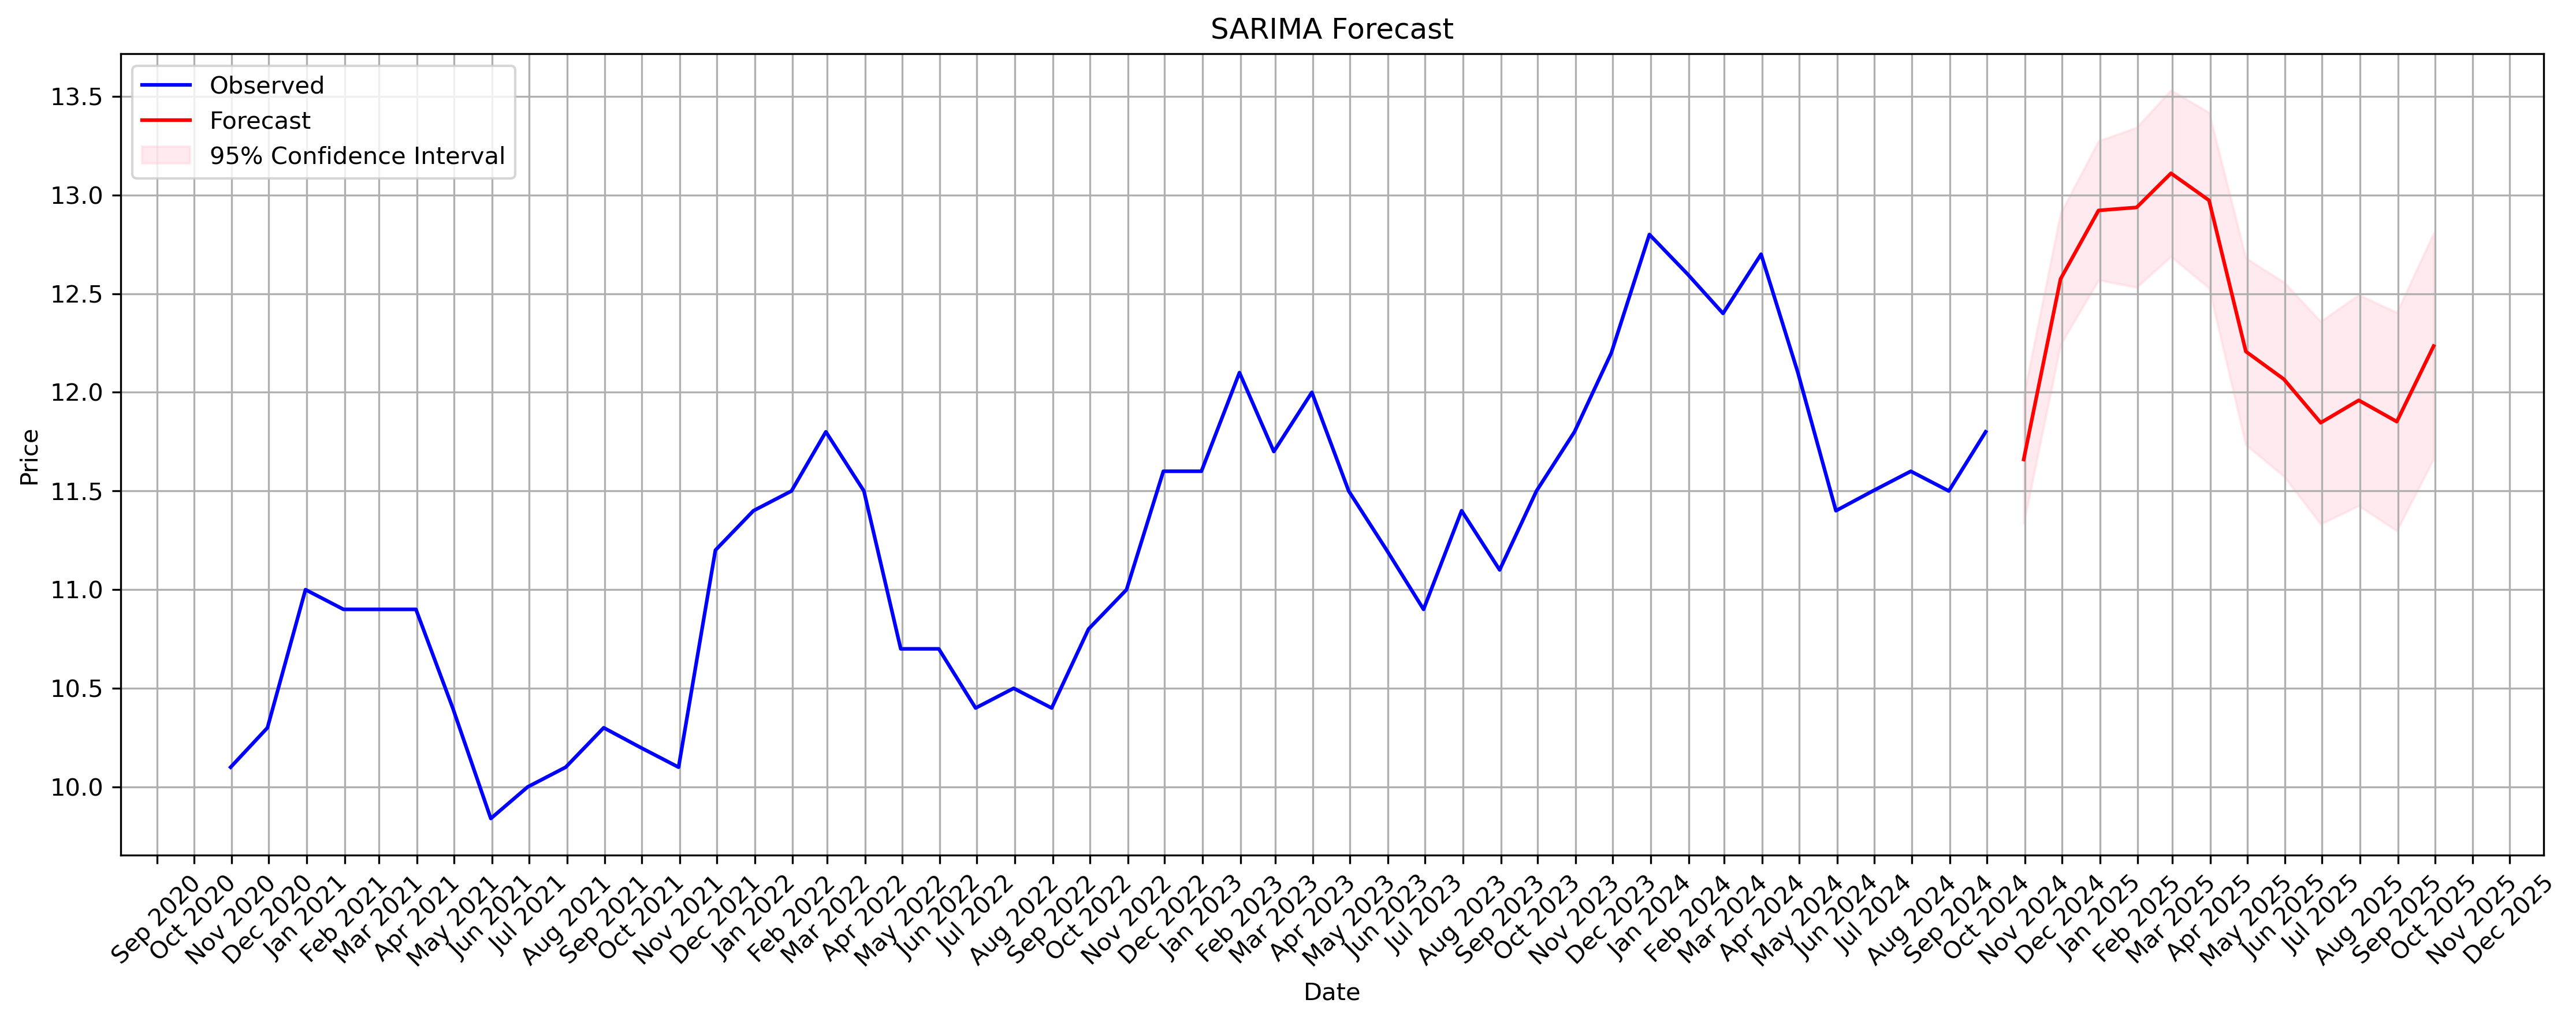

In [22]:
forecast_steps = 12
forecast = result.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_index = pd.date_range(start=df.index[-1] + pd.offsets.MonthEnd(1), periods=forecast_steps, freq='M')

plt.figure(figsize=(15, 6),dpi=300)
plt.plot(df.index, df['Prices'], label='Observed', color='blue')
plt.plot(forecast_index, forecast_mean, label='Forecast', color='red') 

plt.fill_between(
    forecast_index,
    conf_int.iloc[:, 0],
    conf_int.iloc[:, 1],
    color='pink',
    alpha=0.3,
    label='95% Confidence Interval'
)

plt.title('SARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

# Format x-axis ticks by month
plt.gca().xaxis.set_major_locator(m_dates.MonthLocator(interval=1))  # one tick per month
plt.gca().xaxis.set_major_formatter(m_dates.DateFormatter('%b %Y'))  # e.g., Jan 2024
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('forecast.png')
plt.show()

- The forecast line follows an **upward and downward wave pattern**, which reflects historical seasonality. This is expected and ideal for monthly data with yearly seasonality (12-month cycles).
- The forecast includes a **pink shaded region**. The default confidence level for prediction intervals in many statistical software and libraries is typically 95%. This region represents the 95% prediction interval that says _"There is a 95% chance the true future value will fall within this interval"_. The pink shaded region visually expresses **the uncertainty of forecasting natural gas prices**.
- We might find several versions of the forecast line on GitHub that follow the same general pattern (upward and downward) but differ slightly in values or smoothness. This is not a mistake. This is a natural result of **the stochastic nature of time series models**, including SARIMA. The matters the most is the seasonal shape should remain consistent.